In [1]:
import unicodecsv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = '/home/tuna/PycharmProjects/titanic/titanic_data.csv'

passenger_df = pd.read_csv(filename)

In [2]:
passenger_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
len(passenger_df)

891

In [4]:
passenger_df['Age'].mean()

29.69911764705882

In [5]:
len(passenger_df.groupby('Sex').groups['male'])

577

In [6]:
sex = np.array(passenger_df['Sex'])

In [7]:
male = np.array(sex=='male').sum()
male

577

In [8]:
male_passenger = passenger_df[passenger_df['Sex']== 'male']
female_passenger = passenger_df[passenger_df['Sex']== 'female']

In [9]:
len(passenger_df.groupby('Sex').groups['female'])

314

In [10]:
female = np.array(sex=='female').sum()
female

314

In [11]:
ages = np.array(passenger_df['Age'])
number_of_children = np.array(ages<13).sum()
number_of_children

69

In [12]:
passenger_df['Age'].apply(lambda x: x < 13).sum()

69

In [13]:
kids = passenger_df[passenger_df['Age']<13]
kids.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C


In [14]:
def child_age(x):
    return x<13

passenger_df['kids'] = passenger_df['Age'].apply(child_age)
passenger_df['kids'].value_counts()

False    822
True      69
Name: kids, dtype: int64

In [15]:
kid_passenger = passenger_df[passenger_df['kids']== True]
kid_passenger['Sex'].value_counts()

male      37
female    32
Name: Sex, dtype: int64

In [16]:
kid_passenger[kid_passenger['Sex']=='male']['Survived'].value_counts()

1    21
0    16
Name: Survived, dtype: int64

In [17]:
kid_passenger['Survived'].value_counts()

1    40
0    29
Name: Survived, dtype: int64

In [18]:
def age_distribution(x):
    if x>=0 and x <13:
        return 'Child'
    elif x>=13 and x<=24:
        return 'Young'
    else:
        return 'Adult'
    
passenger_df['Age'].apply(age_distribution).value_counts()

Adult    614
Young    208
Child     69
Name: Age, dtype: int64

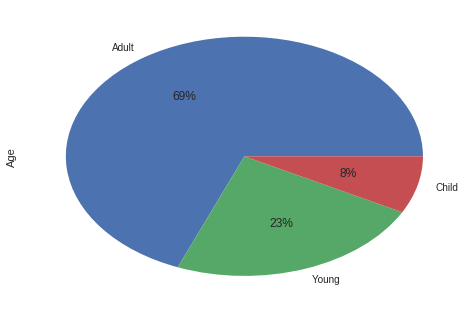

In [19]:
passenger_df['Age'].apply(age_distribution).value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

In [20]:
del passenger_df['kids']

In [21]:
passenger_class = np.array(passenger_df['Pclass'])
number_of_first_class = np.array(passenger_class==1).sum()
number_of_first_class

216

In [22]:
len(passenger_df[passenger_df['Pclass']==[1]])

216

In [23]:
passenger_class = np.array(passenger_df['Pclass'])
number_of_second_class = np.array(passenger_class==2).sum()
number_of_second_class

184

In [24]:
passenger_class = np.array(passenger_df['Pclass'])
number_of_third_class = np.array(passenger_class==3).sum()
number_of_third_class

491

In [25]:
num_class = passenger_df['Pclass'].value_counts()
num_class

3    491
1    216
2    184
Name: Pclass, dtype: int64

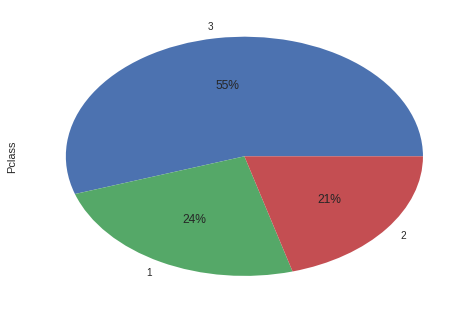

In [26]:
num_class.plot(kind='pie', autopct='%1.0f%%')
plt.show()

In [27]:
num_firstclass = passenger_df[passenger_df['Pclass']==[1]]
num_firstclass.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [28]:
survive = np.array(passenger_df['Survived'])
number_of_survived = np.array(survive==1).sum()
number_of_not_survived = np.array(survive==0).sum()

In [29]:
number_of_survived

342

In [30]:
number_of_not_survived

549

In [31]:
embarked_port = np.array(passenger_df['Embarked'])
cherbourg = np.array(embarked_port=='C').sum()
queenstown = np.array(embarked_port=='Q').sum()
southampton = np.array(embarked_port=='S').sum()

print (cherbourg, queenstown, southampton)

168 77 644


In [32]:
len(passenger_df.groupby('Embarked').groups['S'])

644

In [33]:
passenger_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

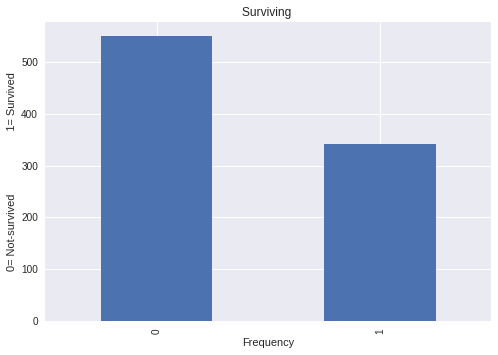

In [34]:
passenger_df['Survived'].value_counts().plot(kind='bar', title='Surviving ')
plt.ylabel('0= Not-survived                     1= Survived')
plt.xlabel('Frequency')
plt.show()

In [35]:
passenger_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [36]:
print (passenger_df['Embarked'].count())

889


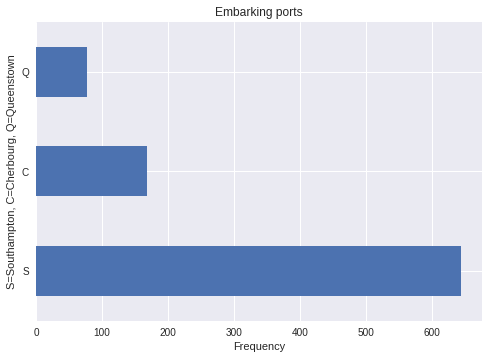

In [37]:
passenger_df['Embarked'].value_counts().plot(kind='barh')
plt.title('Embarking ports')
plt.xlabel('Frequency')
plt.ylabel('S=Southampton, C=Cherbourg, Q=Queenstown')
plt.show()

In [38]:
passenger_df.ix[4]

PassengerId                           5
Survived                              0
Pclass                                3
Name           Allen, Mr. William Henry
Sex                                male
Age                                  35
SibSp                                 0
Parch                                 0
Ticket                           373450
Fare                               8.05
Cabin                               NaN
Embarked                              S
Name: 4, dtype: object

In [39]:
passenger_df.sample(n=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
425,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S


In [40]:
passenger_df.sort_values(by= 'Age', ascending=False)[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q


In [41]:
class_survived = passenger_df.pivot_table(index='Pclass', columns='Sex',values='Survived', aggfunc='sum')
class_survived
#'Survived' sütununda hayatta kalanlar '1', kurtulamayanlar '0' ile gösterildiği için aggfunc 'sum' ile 1 olan
#değerlerin toplamını verdi. Böylece hayatta kalanların sayısını bulabilmiş olduk.

Sex,female,male
Pclass,,
1,91,45
2,70,17
3,72,47


In [42]:
kid_passenger.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,kids
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,True
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,True
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,True
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,True


In [43]:
del kid_passenger['kids']

In [44]:
kid_passenger.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C


In [45]:
male_passenger.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [46]:
male_kid_passenger = kid_passenger[kid_passenger['Sex']=='male']
len(male_kid_passenger)

37

In [47]:
female_kid_passenger = kid_passenger[kid_passenger['Sex']=='female']
len(female_kid_passenger)

32

In [48]:
adult_male_passenger = male_passenger.drop(male_kid_passenger.index[:])
adult_male_passenger.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S


In [49]:
adult_female_passenger = female_passenger.drop(female_kid_passenger.index[:])
adult_female_passenger.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


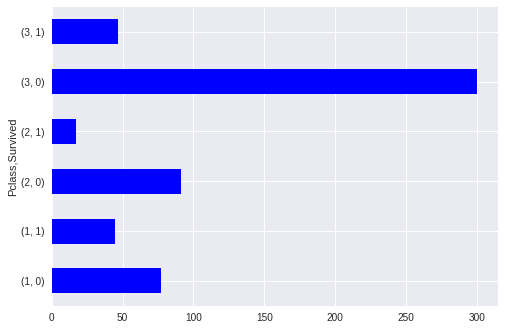

In [50]:
man_class_survived = male_passenger.groupby('Pclass')['Survived'].value_counts()
man_class_survived.plot(kind='barh', colormap='winter')
plt.show()

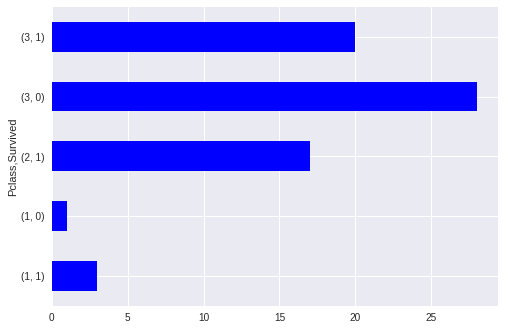

In [51]:
kid_class_survived = kid_passenger.groupby('Pclass')['Survived'].value_counts()
kid_class_survived.plot(kind='barh', colormap='winter')
plt.show()

In [52]:
kid_class_survived

Pclass  Survived
1       1            3
        0            1
2       1           17
3       0           28
        1           20
Name: Survived, dtype: int64

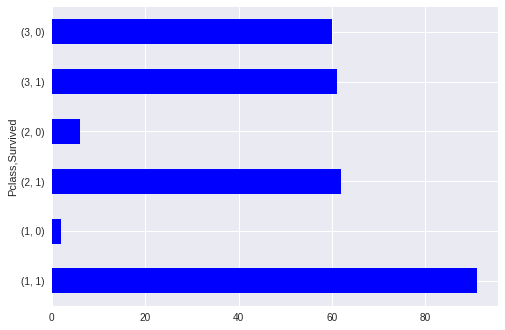

In [53]:
adult_female_class_survived = adult_female_passenger.groupby('Pclass')['Survived'].value_counts()
adult_female_class_survived.plot(kind='barh', colormap='winter')
plt.show()

In [54]:
adult_female_class_survived

Pclass  Survived
1       1           91
        0            2
2       1           62
        0            6
3       1           61
        0           60
Name: Survived, dtype: int64

In [55]:
adult_female_passenger.groupby('Pclass')['Survived'].mean()

Pclass
1    0.978495
2    0.911765
3    0.504132
Name: Survived, dtype: float64

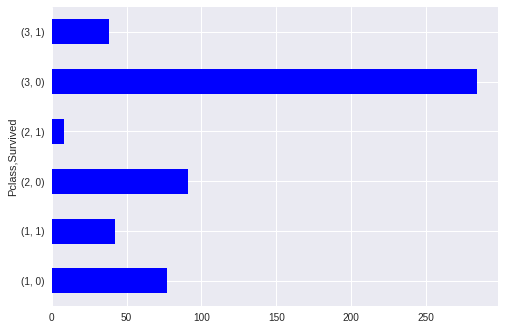

In [56]:
adult_male_class_survived = adult_male_passenger.groupby('Pclass')['Survived'].value_counts()
adult_male_class_survived.plot(kind='barh', colormap='winter')
plt.show()

In [57]:
adult_male_passenger.groupby('Pclass')['Survived'].mean()

Pclass
1    0.352941
2    0.080808
3    0.118012
Name: Survived, dtype: float64

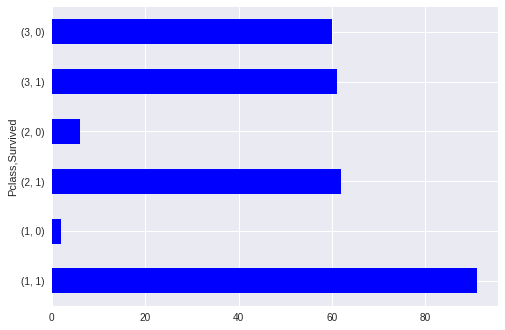

In [58]:
adult_female_class_survived = adult_female_passenger.groupby('Pclass')['Survived'].value_counts()
adult_female_class_survived.plot(kind='barh', colormap='winter')
plt.show()

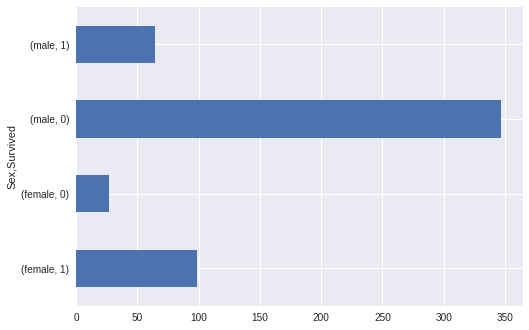

In [59]:
without_sibsp_passenger = passenger_df[passenger_df['SibSp']==[0]]
alone_passenger = without_sibsp_passenger[without_sibsp_passenger['Parch']==[0]]
alone_passenger.groupby('Sex')['Survived'].value_counts().plot(kind='barh')
plt.show()

In [60]:
alone_passenger.groupby('Sex')['Survived'].mean()

Sex
female    0.785714
male      0.155718
Name: Survived, dtype: float64

In [61]:
with_parch = passenger_df[passenger_df['Parch']!=[0]]
family_passenger = with_parch[with_parch['SibSp']!=[0]]

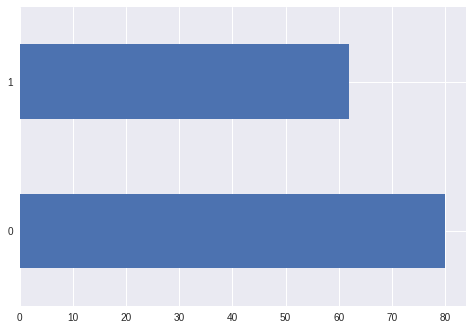

In [62]:
family_passenger['Survived'].value_counts().plot(kind='barh')
plt.show()

In [63]:
print (family_passenger['Survived'].mean()) 
print (alone_passenger['Survived'].mean())

0.43661971830985913
0.30353817504655495


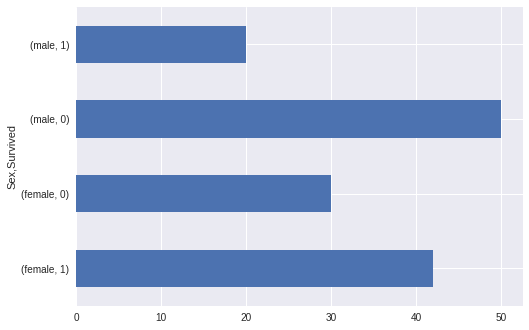

In [64]:
family_passenger.groupby('Sex')['Survived'].value_counts().plot(kind='barh')
plt.show()

In [65]:
family_passenger.groupby('Sex')['Survived'].mean()

Sex
female    0.583333
male      0.285714
Name: Survived, dtype: float64

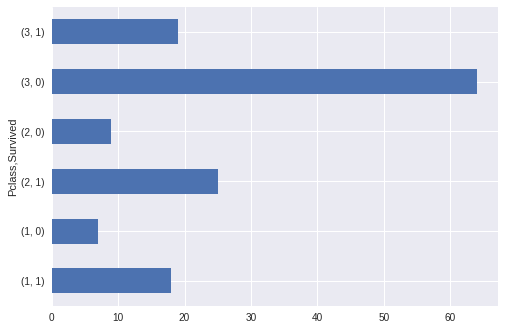

In [66]:
family_passenger.groupby('Pclass')['Survived'].value_counts().plot(kind='barh')
plt.show()

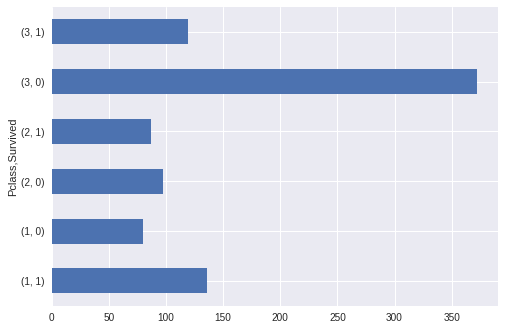

In [67]:
passenger_df.groupby('Pclass')['Survived'].value_counts().plot(kind='barh')
plt.show()

In [68]:
class_survived = passenger_df.groupby(['Pclass', 'Survived'])
class_survived

In [69]:
class_survived.size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [70]:
class_survived.size().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


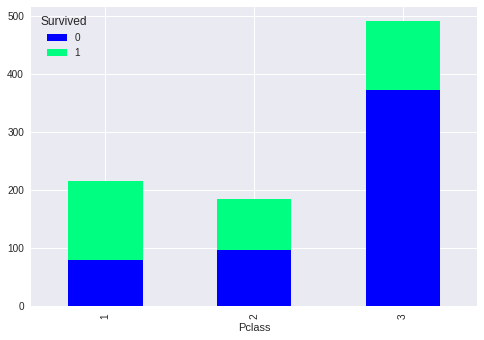

In [71]:
count_class_survived = class_survived.size().unstack()
count_class_survived.plot(kind='bar', stacked=True, colormap='winter')
plt.show()

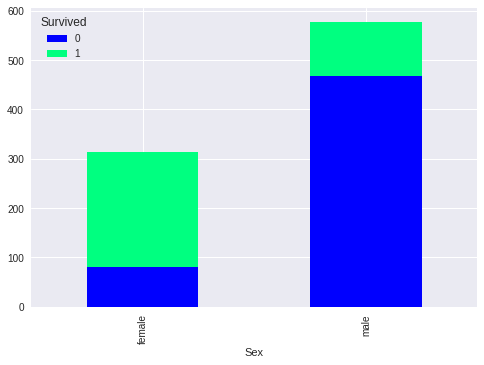

In [72]:
sex_survived = passenger_df.groupby(['Sex', 'Survived'])
sex_survived.size().unstack().plot(kind='bar', stacked=True, colormap='winter')
plt.show()